In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras as ks



In [3]:
dataset = pd.read_csv('sensor.csv')
dataset.head()

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,1/2/2023 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,1/2/2023 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,1/2/2023 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,1/2/2023 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,1/2/2023 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [4]:
# Find NAN
nan_df = dataset[dataset.isna().any(axis=1)]
display(nan_df.head())

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious


In [5]:
dataset = dataset.dropna(how='all')
dataset.head()

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,1/2/2023 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,1/2/2023 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,1/2/2023 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,1/2/2023 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,1/2/2023 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [6]:
from sklearn.preprocessing import MinMaxScaler
# Set aside the column containing IP addresses
ip_address_column = dataset['IP_Address']
dataset = dataset.drop(columns=['IP_Address'])
# Convert datetime columns to numeric representation 
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])
dataset['Timestamp'] = dataset['Timestamp'].astype('int64') // 10**9  # Convert to UNIX timestamp (seconds)
scaler = MinMaxScaler()
scaler.fit(dataset)
normalized_dataset = scaler.transform(dataset)
normalized_dataset_df = pd.DataFrame(normalized_dataset, columns=dataset.columns)
normalized_dataset_df['IP_Address'] = ip_address_column
normalized_dataset_df.head()



,Node_ID,Timestamp,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,Energy_Consumption_Rate,...,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious,IP_Address
0,0.0000,0.000000,0.370660,0.421887,0.483303,0.726891,0.387964,0.654562,0.588587,0.210505,...,0.438084,0.364206,0.538487,0.360808,0.258052,0.296612,0.399257,0.362036,0.0,192.168.119.138
1,0.0001,0.000004,0.446889,0.240218,0.660597,0.432764,0.261806,0.621356,0.403047,0.239503,...,0.290589,0.252353,0.376536,0.358555,0.157552,0.390018,0.505119,0.606860,0.0,192.168.225.56
2,0.0002,0.000008,0.188397,0.224170,0.522014,0.305064,0.380438,0.457839,0.492789,0.246322,...,0.286667,0.230932,0.500502,0.275840,0.081752,0.541996,0.451933,0.641372,0.0,192.168.187.210
3,0.0003,0.000011,0.244653,0.318063,0.372078,0.354078,0.351013,0.567243,0.516964,0.160200,...,0.407125,0.154018,0.397869,0.180935,0.191066,0.521447,0.574054,0.679332,0.0,192.168.78.245
4,0.0004,0.000015,0.250453,0.179776,0.780017,0.681119,0.440298,0.662715,0.605663,0.290894,...,0.431003,0.328383,0.272133,0.222654,0.131454,0.372950,0.344322,0.326941,0.0,192.168.233.229


In [7]:
df = pd.DataFrame(dataset)
#dataset['Timestamp'] = pd.to_numeric(dataset['Timestamp'])
#dataset['IP_Address'] = pd.to_numeric(dataset['IP_Address'])
dataset['Packet_Rate'] = pd.to_numeric(dataset['Packet_Rate'])
dataset['Packet_Drop_Rate'] = pd.to_numeric(dataset['Packet_Drop_Rate'])
dataset['Packet_Duplication_Rate'] = pd.to_numeric(dataset['Packet_Duplication_Rate'])
dataset['Signal_Strength'] = pd.to_numeric(dataset['Signal_Strength'])
dataset['SNR'] = pd.to_numeric(dataset['SNR'])
dataset['Battery_Level'] = pd.to_numeric(dataset['Battery_Level'])
dataset['Energy_Consumption_Rate'] = pd.to_numeric(dataset['Energy_Consumption_Rate'])
dataset['Number_of_Neighbors'] = pd.to_numeric(dataset['Number_of_Neighbors'])
dataset['Route_Request_Frequency'] = pd.to_numeric(dataset['Route_Request_Frequency'])
dataset['Route_Reply_Frequency'] = pd.to_numeric(dataset['Route_Reply_Frequency'])
dataset['Data_Transmission_Frequency'] = pd.to_numeric(dataset['Data_Transmission_Frequency'])
dataset['Data_Reception_Frequency'] = pd.to_numeric(dataset['Data_Reception_Frequency'])
dataset['Error_Rate'] = pd.to_numeric(dataset['Error_Rate'])
dataset['CPU_Usage'] = pd.to_numeric(dataset['CPU_Usage'])
dataset['Memory_Usage'] = pd.to_numeric(dataset['Memory_Usage'])
dataset['Bandwidth'] = pd.to_numeric(dataset['Bandwidth'])

In [8]:
#Data Processisng
from sklearn.model_selection import train_test_split
#x = dataset.drop(['Is_Malicious','Timestamp','IP_Address'],axis=1)
x = dataset.drop(['Is_Malicious'],axis=1)
y = dataset['Is_Malicious']

      Node_ID   Timestamp  Packet_Rate  Packet_Drop_Rate  \
5374     5375  1680456840    60.193553          1.685398   
795       796  1672665300    57.180367          2.670102   
2201     2202  1675341660    58.447065          0.696213   
6198     6199  1683011880    54.725012          1.157958   
2780     2781  1675376400    44.937888          2.334094   
...       ...         ...          ...               ...   
720       721  1672660800    79.240663          2.039228   
2668     2669  1675369680    47.083872          2.329427   
8321     8322  1685731260    51.579461          1.527015   
2360     2361  1675351200    45.949314          2.176237   
5687     5688  1680475620    58.065360          1.593089   

      Packet_Duplication_Rate  Data_Throughput  Signal_Strength        SNR  \
5374                 0.850579        85.254897       -57.673536  16.845359   
795                  0.920585       109.787039       -50.902719  20.236753   
2201                 1.000825        98.66870

array([[<Axes: title={'center': 'Node_ID'}>,
        <Axes: title={'center': 'Timestamp'}>,
        <Axes: title={'center': 'Packet_Rate'}>,
        <Axes: title={'center': 'Packet_Drop_Rate'}>],
       [<Axes: title={'center': 'Packet_Duplication_Rate'}>,
        <Axes: title={'center': 'Data_Throughput'}>,
        <Axes: title={'center': 'Signal_Strength'}>,
        <Axes: title={'center': 'SNR'}>],
       [<Axes: title={'center': 'Battery_Level'}>,
        <Axes: title={'center': 'Energy_Consumption_Rate'}>,
        <Axes: title={'center': 'Number_of_Neighbors'}>,
        <Axes: title={'center': 'Route_Request_Frequency'}>],
       [<Axes: title={'center': 'Route_Reply_Frequency'}>,
        <Axes: title={'center': 'Data_Transmission_Frequency'}>,
        <Axes: title={'center': 'Data_Reception_Frequency'}>,
        <Axes: title={'center': 'Error_Rate'}>],
       [<Axes: title={'center': 'CPU_Usage'}>,
        <Axes: title={'center': 'Memory_Usage'}>,
        <Axes: title={'center': 

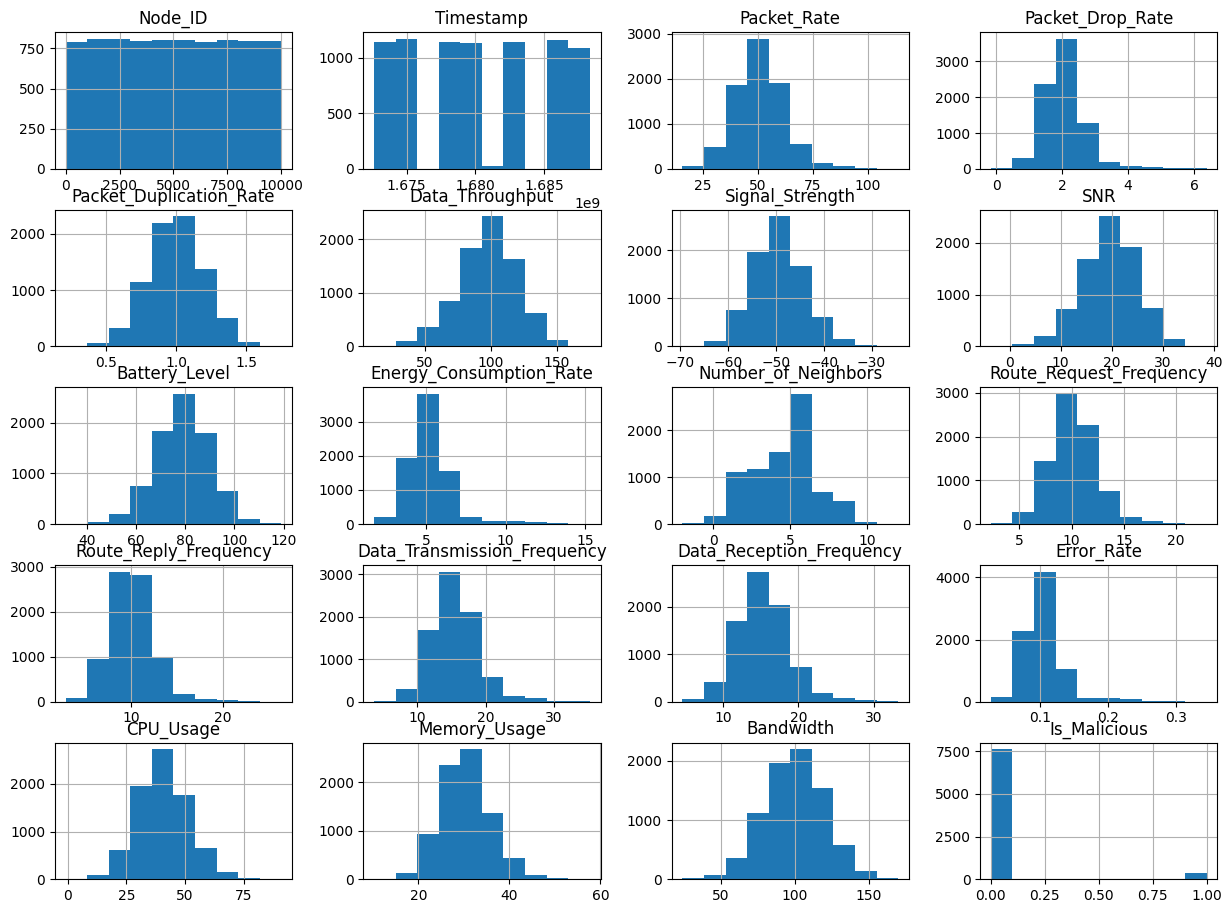

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
train_data = x_train.join(y_train)
print(train_data)
train_data.hist(figsize=(15,11))

<Axes: >

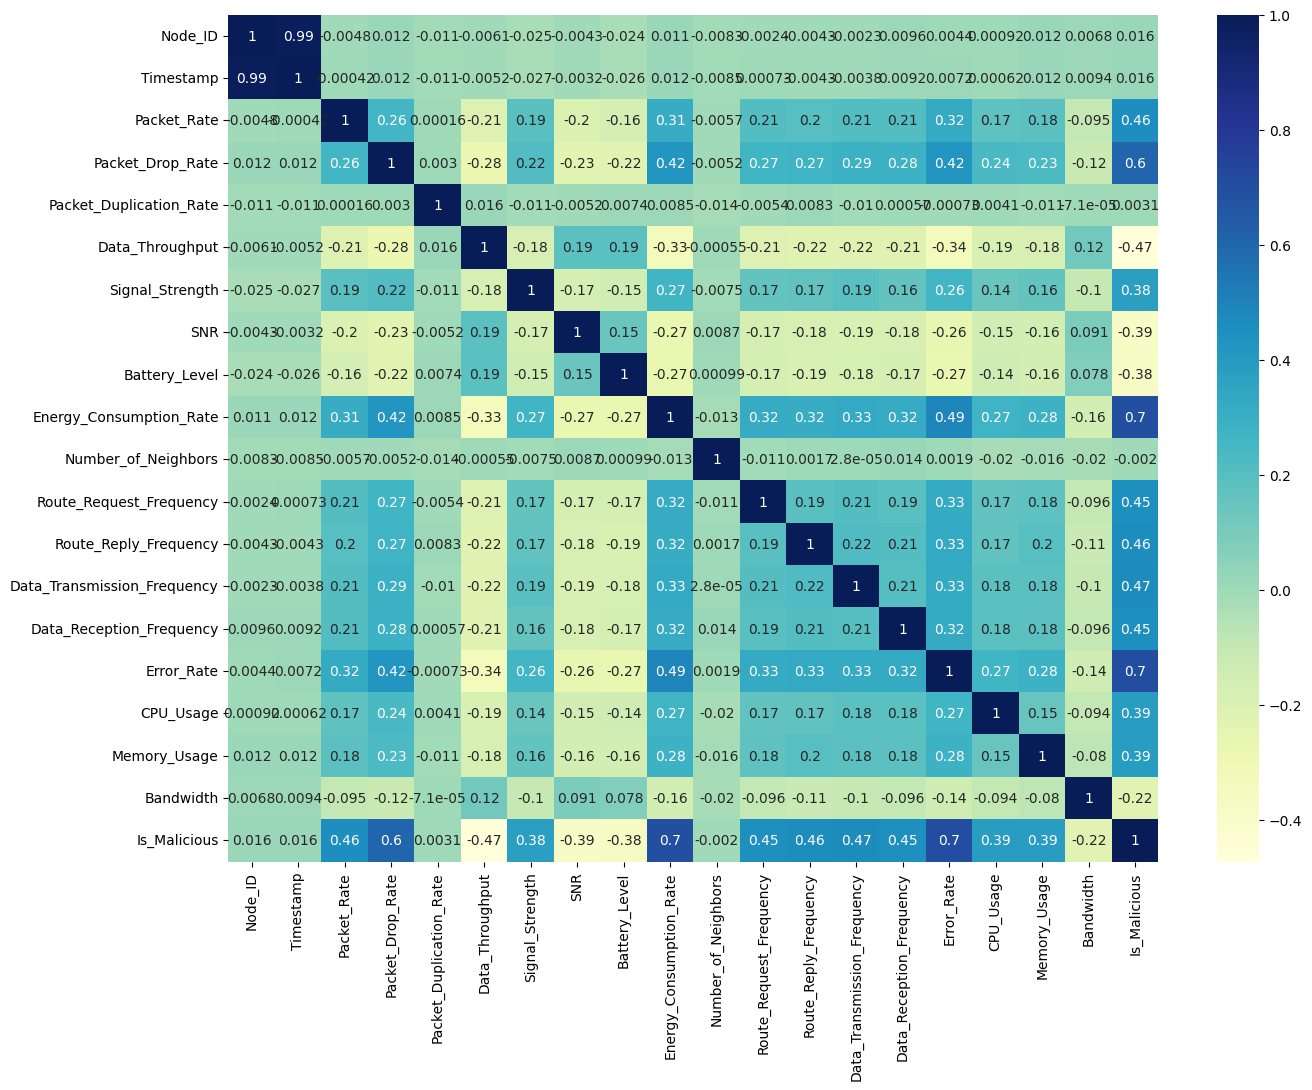

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,11))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [11]:
from scipy.stats import pearsonr
# Select two columns from the dataset to calculate correlation
output_column = 'Is_Malicious'
correlation_results = {}
for column in dataset.columns:
    if column != output_column:
        # Check for NaN values and handle them
        mask = ~np.isnan(dataset[column]) & ~np.isnan(dataset[output_column])
        correlation_coefficient, _ = pearsonr(dataset[column][mask], dataset[output_column][mask])
        correlation_results[column] = correlation_coefficient

# Sort the results by correlation coefficient in descending order
sorted_correlation_results = sorted(correlation_results.items(), key=lambda x: x[1], reverse=True)

# Print the results
for column, correlation_coefficient in sorted_correlation_results:
    print(f"Correlation between {column} and {output_column}: {correlation_coefficient}")

Correlation between Error_Rate and Is_Malicious: 0.7105457053586417
Correlation between Energy_Consumption_Rate and Is_Malicious: 0.7025543933388565
Correlation between Packet_Drop_Rate and Is_Malicious: 0.6036342936951669
Correlation between Packet_Rate and Is_Malicious: 0.4670940481992473
Correlation between Data_Transmission_Frequency and Is_Malicious: 0.4637703911830785
Correlation between Data_Reception_Frequency and Is_Malicious: 0.4597602320057451
Correlation between Route_Reply_Frequency and Is_Malicious: 0.45688211390726186
Correlation between Route_Request_Frequency and Is_Malicious: 0.45573572202847984
Correlation between Memory_Usage and Is_Malicious: 0.4026946152750799
Correlation between CPU_Usage and Is_Malicious: 0.40156877480806863
Correlation between Signal_Strength and Is_Malicious: 0.38386363780343946
Correlation between Timestamp and Is_Malicious: 0.010610639141888294
Correlation between Packet_Duplication_Rate and Is_Malicious: 0.010230354722061293
Correlation bet

In [12]:
x = dataset.drop(['Number_of_Neighbors','Node_ID','Packet_Duplication_Rate','Timestamp'],axis=1)

In [13]:
#LinearRegression
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['Is_Malicious'], axis = 1), train_data['Is_Malicious']
reg = LinearRegression()
reg.fit(x_train, y_train )

LinearRegression()

In [14]:
test_data = x_test.join(y_test)

In [15]:
test_data

,Node_ID,Timestamp,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,Energy_Consumption_Rate,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
2853,2854,1675380780,55.534493,1.241898,1.254786,119.713033,-44.334085,10.875215,70.688175,6.067954,3,10.667798,10.055816,7.794535,20.081202,0.065335,40.529753,30.866605,125.729715,0
1992,1993,1675329120,55.411257,3.233824,1.289018,121.527240,-53.958496,25.833535,84.029995,3.747809,4,9.805094,8.750291,15.871494,13.240463,0.133372,42.599163,31.979228,87.844250,0
4914,4915,1680429240,44.670652,2.598265,1.004014,93.820515,-52.997364,14.279176,89.924878,5.226522,6,11.010130,12.442001,15.193397,13.144812,0.078390,53.003983,20.576820,50.509636,0
2174,2175,1675340040,41.554824,2.644189,1.153905,65.985641,-45.478735,22.114392,78.328744,5.015983,3,9.934404,9.302864,20.288439,11.290847,0.069455,35.638719,26.080887,92.234293,0
6812,6813,1683048720,43.481828,1.982917,0.788941,123.142929,-49.126975,24.036317,78.381793,4.655493,5,8.210618,12.597081,15.614462,10.505083,0.109131,23.104118,28.367559,77.187966,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,3534,1677754380,64.324266,1.392244,0.729116,62.001743,-56.713951,17.738372,91.215582,5.850339,2,11.017415,8.894321,11.313366,13.413020,0.074217,44.062499,36.974597,90.837472,0
1182,1183,1672688520,61.212251,1.110415,1.321937,96.400957,-52.224516,17.524477,84.486813,4.775779,3,12.730000,9.062871,15.707771,14.716681,0.086482,43.190065,28.858898,89.427035,0
1033,1034,1672679580,25.438293,2.278217,1.288661,100.223621,-50.014239,21.103820,87.080906,6.125304,5,10.702266,9.343559,15.216162,9.846807,0.090224,31.471362,29.169483,85.815979,0
4442,4443,1680400920,53.457201,1.992900,1.145844,108.570693,-48.250728,20.402115,66.972133,4.819803,6,11.791239,9.623651,13.222996,13.724362,0.131218,29.773118,36.315200,89.383202,0


In [16]:
x_test, y_test = test_data.drop(['Is_Malicious'], axis = 1), test_data['Is_Malicious']


In [17]:
reg.score(x_test,y_test)

0.8491142079627669

In [18]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [19]:
forest.score(x_test,y_test)

0.9836305916305916

In [20]:
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_test: (2000, 19)
Shape of y_test: (2000,)


In [21]:
#ANN
'''import keras
from keras import layers

model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(19), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]) 
model.compile(optimizer='adam',
                     loss=keras.losses.SparseCategoricalCrossentropy(),
                     metrics=['accuracy']) 
 
x = np.column_stack((x_train, y_train))
y = y_train.values
 
model.fit(x_train, y_train, epochs=10, batch_size=8)'''
import keras
from keras import layers

model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(19,), activation='relu'),  # Note the comma after 19 to make it a tuple
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]) 

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) 
x = np.column_stack((x_train, y_train))
y = y_train.values
 
model.fit(x_train, y_train, epochs=10, batch_size=8)
x = np.column_stack((x_test, y_test))
y = y_test
model.evaluate(x=x_test, y=y_test, batch_size=8)


Epoch 1/10
1000/1000 [==============================] - 48s 15ms/step - loss: 1032129.6250 - accuracy: 0.9046
Epoch 2/10
1000/1000 [==============================] - 15s 15ms/step - loss: 355049.0938 - accuracy: 0.9109
Epoch 3/10
1000/1000 [==============================] - 17s 17ms/step - loss: 204945.3281 - accuracy: 0.9106
Epoch 4/10
1000/1000 [==============================] - 13s 13ms/step - loss: 94935.3516 - accuracy: 0.9099
Epoch 5/10
1000/1000 [==============================] - 11s 11ms/step - loss: 53962.9609 - accuracy: 0.9086
Epoch 6/10
1000/1000 [==============================] - 12s 12ms/step - loss: 30647.7266 - accuracy: 0.9119
Epoch 7/10
1000/1000 [==============================] - 14s 14ms/step - loss: 24764.5566 - accuracy: 0.9071
Epoch 8/10
1000/1000 [==============================] - 25s 25ms/step - loss: 18965.1172 - accuracy: 0.9081
Epoch 9/10
1000/1000 [==============================] - 22s 22ms/step - loss: 7698.6851 - accuracy: 0.9126
Epoch 10/10
250/250 [====

[0.21766047179698944, 0.9449999928474426]

In [22]:
#Cross-Validation
from sklearn.model_selection import GridSearchCV
param_grid = {
   "n_estimators":[100,200,300],
   "min_samples_split":[2,4],
   #"n_estimators":[3,10,30],
   "max_features":[2,4,6,8]
}

grid_search = GridSearchCV(forest,param_grid, cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [23]:
best_forest = grid_search.best_estimator_

In [24]:
best_forest.score(x_test,y_test)

0.9924373897707232